# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Metric&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | tralee
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | chernyshevskiy
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | bor
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | vilyuysk
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | enewetak
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | dul'durga
Processing Record 18 of Set 1 | kill devil hills
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | zhigalovo
Processing Record 21 of Set 1 | durban
Processing Record 22 of Set 1 | pijijiapan
Processing Reco

Processing Record 37 of Set 4 | eilat
Processing Record 38 of Set 4 | borda da mata
Processing Record 39 of Set 4 | xiazhen
Processing Record 40 of Set 4 | kailua-kona
Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | constantia
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | hawaiian paradise park
Processing Record 45 of Set 4 | yoloten
Processing Record 46 of Set 4 | irymple
Processing Record 47 of Set 4 | kapuskasing
Processing Record 48 of Set 4 | miracema do tocantins
Processing Record 49 of Set 4 | brisas de zicatela
Processing Record 0 of Set 5 | chernyshevsk
Processing Record 1 of Set 5 | pont rouge
Processing Record 2 of Set 5 | puerto aysen
Processing Record 3 of Set 5 | tolanaro
Processing Record 4 of Set 5 | bikenibeu village
Processing Record 5 of Set 5 | maumere
Processing Record 6 of Set 5 | alaghsas
Processing Record 7 of Set 5 | feodosiya
Processing Record 8 of Set 5 | tazovsky
Processing Record 9 of Set 5 | tanjung selo

Processing Record 26 of Set 8 | dunedin
Processing Record 27 of Set 8 | labasa
Processing Record 28 of Set 8 | kavieng
Processing Record 29 of Set 8 | sorong
Processing Record 30 of Set 8 | vadso
Processing Record 31 of Set 8 | pontes e lacerda
Processing Record 32 of Set 8 | praia da vitoria
Processing Record 33 of Set 8 | devils lake
Processing Record 34 of Set 8 | deir ez-zor
Processing Record 35 of Set 8 | port macquarie
Processing Record 36 of Set 8 | fort-shevchenko
Processing Record 37 of Set 8 | raja
Processing Record 38 of Set 8 | st. john's
Processing Record 39 of Set 8 | salto
Processing Record 40 of Set 8 | mandalgovi
Processing Record 41 of Set 8 | ola
Processing Record 42 of Set 8 | morteros
Processing Record 43 of Set 8 | belmonte
Processing Record 44 of Set 8 | chibougamau
Processing Record 45 of Set 8 | mwinilunga
Processing Record 46 of Set 8 | keflavik
Processing Record 47 of Set 8 | opuwo
Processing Record 48 of Set 8 | la paz
Processing Record 49 of Set 8 | erenhot

Processing Record 16 of Set 12 | oak grove
Processing Record 17 of Set 12 | onsala
Processing Record 18 of Set 12 | cockburn town
Processing Record 19 of Set 12 | dubbo
Processing Record 20 of Set 12 | antsiranana
Processing Record 21 of Set 12 | san-pedro
Processing Record 22 of Set 12 | tarawa
Processing Record 23 of Set 12 | koneurgench
City not found. Skipping...
Processing Record 24 of Set 12 | wenling
Processing Record 25 of Set 12 | stornoway
Processing Record 26 of Set 12 | mount pleasant
Processing Record 27 of Set 12 | north bend
Processing Record 28 of Set 12 | miyanoura
City not found. Skipping...
Processing Record 29 of Set 12 | araban
Processing Record 30 of Set 12 | la cocha
Processing Record 31 of Set 12 | mil'kovo
Processing Record 32 of Set 12 | santo andre
Processing Record 33 of Set 12 | berbera
Processing Record 34 of Set 12 | pedregulho
Processing Record 35 of Set 12 | usinsk
Processing Record 36 of Set 12 | kuta
Processing Record 37 of Set 12 | al qitena
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,-3.27,93,0,2.57,US,1697219487
1,kingston,17.9970,-76.7936,33.47,65,20,7.72,JM,1697219239
2,tralee,52.2704,-9.7026,10.60,68,45,7.85,IE,1697219488
3,albany,42.6001,-73.9662,16.44,53,10,1.79,US,1697219488
4,chernyshevskiy,63.0128,112.4714,-2.25,83,100,1.72,RU,1697219489


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,-3.27,93,0,2.57,US,1697219487
1,kingston,17.9970,-76.7936,33.47,65,20,7.72,JM,1697219239
2,tralee,52.2704,-9.7026,10.60,68,45,7.85,IE,1697219488
3,albany,42.6001,-73.9662,16.44,53,10,1.79,US,1697219488
4,chernyshevskiy,63.0128,112.4714,-2.25,83,100,1.72,RU,1697219489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

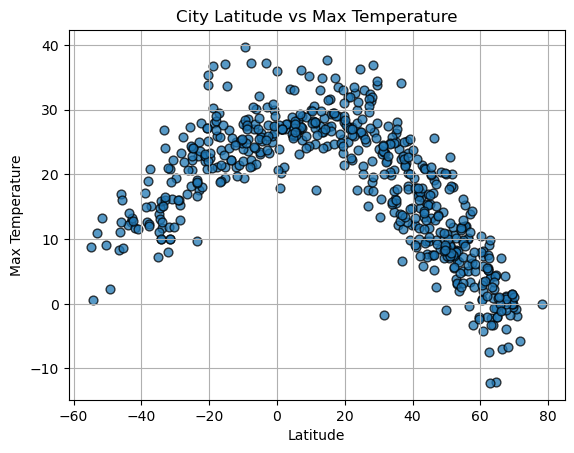

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", marker="o", grid=True, title="City Latitude vs Max Temperature", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

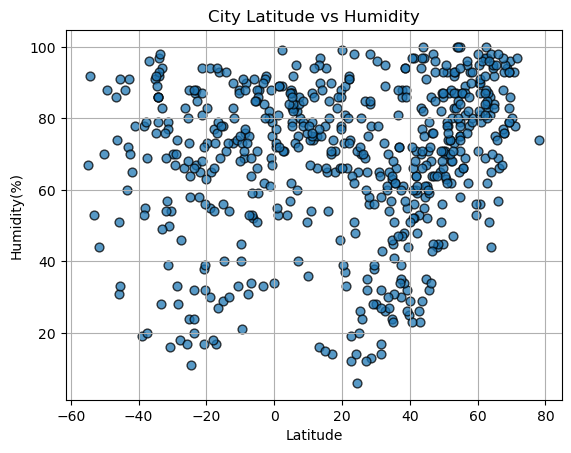

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", marker="o", grid=True, title="City Latitude vs Humidity", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

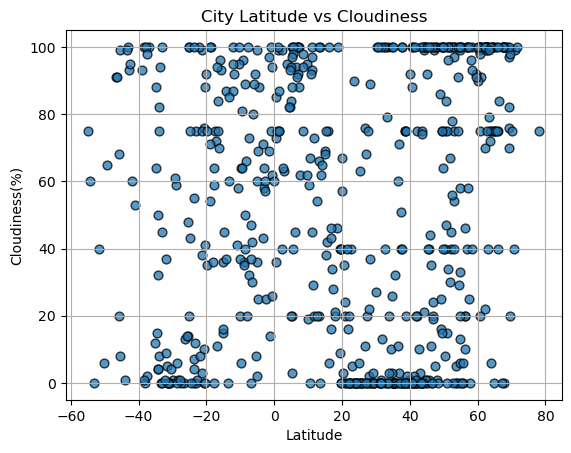

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o", grid=True, title="City Latitude vs Cloudiness", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

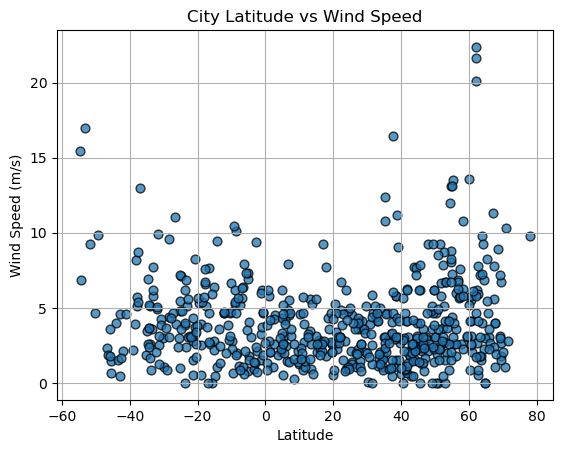

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker="o", grid=True, title="City Latitude vs Wind Speed", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots




In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,-3.27,93,0,2.57,US,1697219487
1,kingston,17.9970,-76.7936,33.47,65,20,7.72,JM,1697219239
2,tralee,52.2704,-9.7026,10.60,68,45,7.85,IE,1697219488
3,albany,42.6001,-73.9662,16.44,53,10,1.79,US,1697219488
4,chernyshevskiy,63.0128,112.4714,-2.25,83,100,1.72,RU,1697219489


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,margaret river,-33.9500,115.0667,11.72,92,8,5.09,AU,1697219489
8,port-aux-francais,-49.3500,70.2167,2.27,88,65,9.82,TF,1697219490
10,puerto natales,-51.7236,-72.4875,13.25,44,40,9.26,CL,1697219491
13,blackmans bay,-43.0167,147.3167,12.63,72,100,0.45,AU,1697219494
20,durban,-29.8579,31.0292,19.51,70,1,1.04,ZA,1697219498


###  Temperature vs. Latitude Linear Regression Plot

Text(63.0128, 2.25, 'y = -0.48x + 34.61')

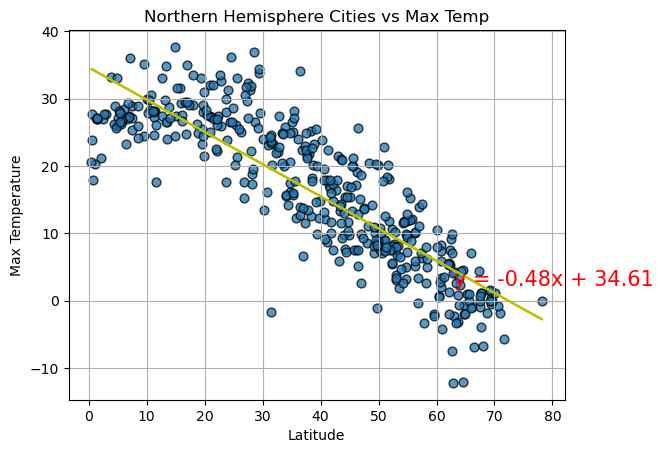

In [26]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp", marker="o", 
                      grid=True, title="Northern Hemisphere Cities vs Max Temp", 
                      facecolors="blue", alpha=0.75, edgecolors="black", s=40)


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")


slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values ,regress_values,"y-")
plt.annotate(line_eq, (63.0128, 2.25),fontsize=15,color="red")

Text(-29.8579, 19.51, 'y = 0.4x + 30.12')

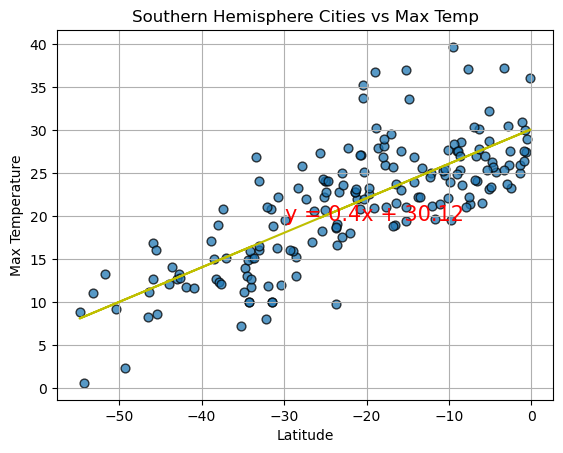

In [24]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp", marker="o", grid=True, title="Southern Hemisphere Cities vs Max Temp", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values ,regress_values,"y-")
plt.annotate(line_eq, (-29.8579, 19.51),fontsize=15,color="red")

**Discussion about the linear relationship:** The linear regression is negative in our evaluation of the northern hemisphere city location and the max temperature, while the linear regression in the southern hemisphere is positive. 

If we look at the graphs and inspect the linear regressions, it is evident the further a city is from the equator, the lower maximum temperature is, and cities that reside closer to the equator typically have a higher max temperature.

### Humidity vs. Latitude Linear Regression Plot

Text(63.0128, 83, 'y = 0.2x + 62.32')

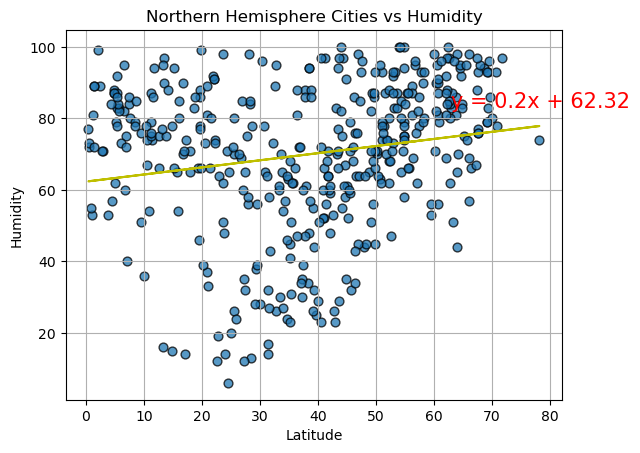

In [29]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", marker="o", grid=True, title="Northern Hemisphere Cities vs Humidity", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values ,regress_values,"y-")
plt.annotate(line_eq, (63.0128, 83),fontsize=15,color="red")

Text(-29.8579, 70, 'y = 0.05x + 66.73')

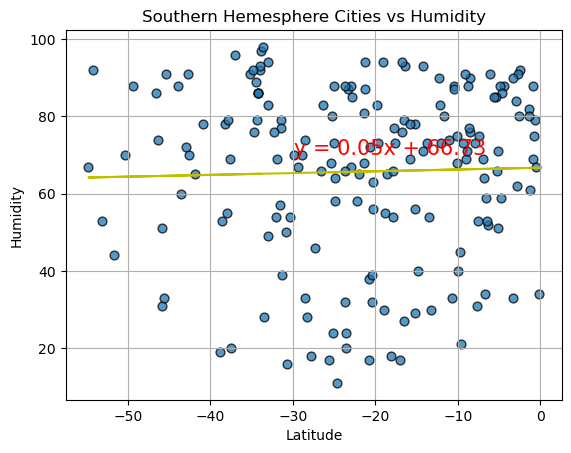

In [32]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", marker="o", grid=True, title="Southern Hemesphere Cities vs Humidity", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

plt.xlabel("Latitude")
plt.ylabel("Humidity")

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values ,regress_values,"y-")
plt.annotate(line_eq, (-29.8579, 70),fontsize=15,color="red")

**Discussion about the linear relationship:** The slopes of our linear regressions tell us about the relationship between humidity and latitude for the cities in the data set. The slopes are .05(Southern Hemisphere) and .03(Northern Hemisphere). Both of those values are very close to zero, displaying that there seems to be little to no correlation between the latitude of a city and its humidity(for both hemispheres). 

### Cloudiness vs. Latitude Linear Regression Plot

Text(63.0128, 100, 'y = 0.31x + 39.08')

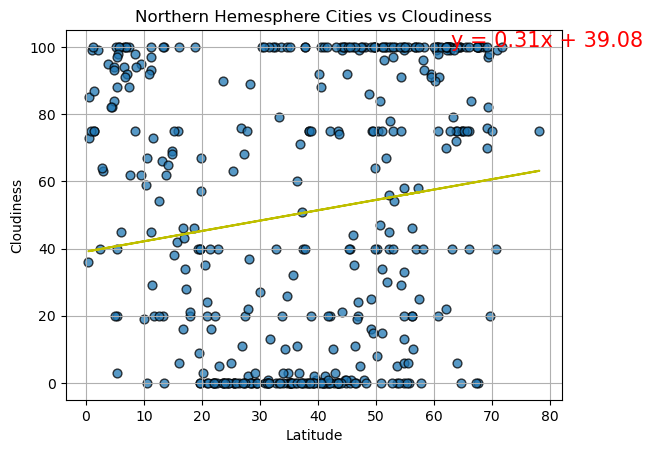

In [33]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o", grid=True, title="Northern Hemesphere Cities vs Cloudiness", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values ,regress_values,"y-")
plt.annotate(line_eq, (63.0128, 100),fontsize=15,color="red")

Text(-49.35, 65, 'y = 0.35x + 56.76')

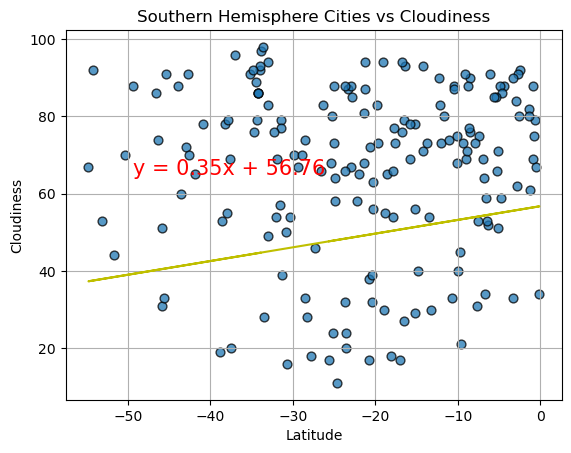

In [42]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", marker="o", grid=True, title="Southern Hemisphere Cities vs Cloudiness", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values ,regress_values,"y-")
plt.annotate(line_eq, (-49.3500, 65),fontsize=15,color="red")

**Discussion about the linear relationship:** Based on the positive linear regression for cities in the southern hemisphere and the negative linear regression for cities in the northern hemisphere, our graph shows that when a city is located closer a city is to the equator it will be cloudier. 

### Wind Speed vs. Latitude Linear Regression Plot

Text(63.0128, 1.72, 'y = 0.04x + 2.4')

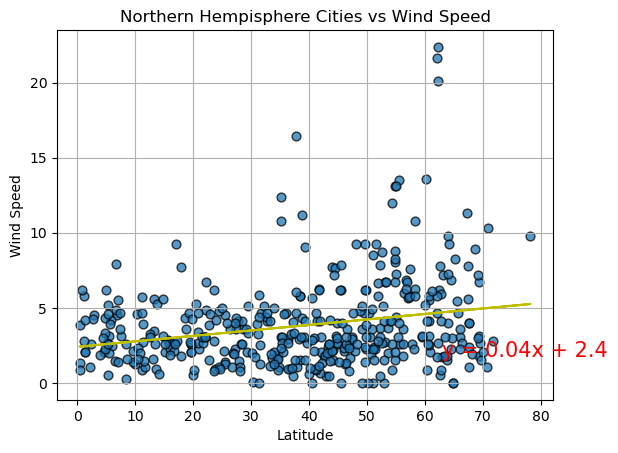

In [47]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker="o", grid=True, title="Northern Hempisphere Cities vs Wind Speed", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values ,regress_values,"y-")
plt.annotate(line_eq, (63.0128, 1.72),fontsize=15,color="red")

Text(-49.35, 9.82, 'y = -0.04x + 3.41')

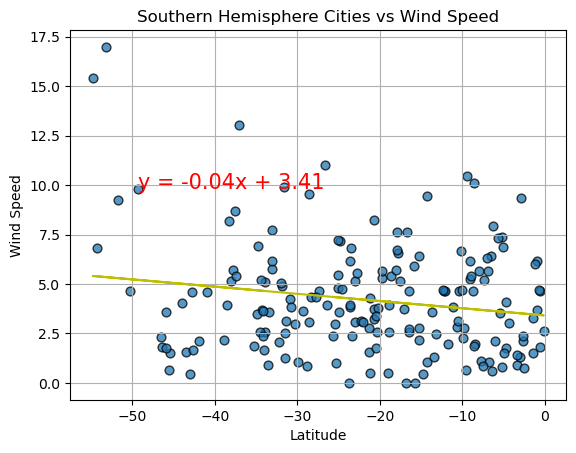

In [46]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker="o", grid=True, title="Southern Hemisphere Cities vs Wind Speed", facecolors="blue", alpha=0.75, edgecolors="black", s=40)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

slope, intercept, r, p, se = stats.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.plot(x_values ,regress_values,"y-")
plt.annotate(line_eq, (-49.3500, 9.82),fontsize=15,color="red")

**Discussion about the linear relationship:** The linear relationship is slightly negative for the cities in the Southern Hemisphere. The slope of linear regression is close to zero, displaying little correlation between the wind speed vs latitdue of cities in the the SH. The Northern Hemisphere cities have a slightly positive linear regression. this also displays a very little correlation btween latitude and wind speed in NH cities. 